In [60]:

import cv2
import math
import csv
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from ultralytics.solutions.solutions import BaseSolution
from ultralytics.utils.plotting import Annotator, colors
from datetime import datetime
%matplotlib inline

https://www.digitalocean.com/community/tutorials/what-is-new-with-yolo

## EJERCICIO 1 
Vamos a usar el modleo YOLOv11 para detectar objetos en una imagen (en este caso vamos a aplicar el modelo directamente sin entrenarlo).
Vamos a aplicarlo en las imagenes deteccion_objetos.jpg y bus.jpg

Partiendo de la imagen deteccion_objetos.jpg y bus.jpg.



In [81]:
ruta_imgs = 'recursos/5_5/'
imgs_arr = [ruta_imgs+"deteccion_objetos.jpg",ruta_imgs+"bus.jpg"]
# cargar modelo yolo11
model = YOLO("recursos/5_5/yolo/yolo11n.pt")   

results = model(imgs_arr)
for res in results:
    res.show()


0: 640x640 11 persons, 7 bicycles, 4 cars, 2 fire hydrants, 2.4ms
1: 640x640 4 persons, 1 bus, 2.4ms
Speed: 2.2ms preprocess, 2.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


** Message: 18:41:30.325: main.vala:507: Starting session with system profile


** Message: 18:41:30.521: main.vala:507: Starting session with system profile


## EJERCICIO 2
Vamos a repetir el ejercicio pero ahora vamos a modificar la salida para que quede de la siguiente forma:

![Imagen con la el resultado que se quiere obtener 1](recursos/5_5/deteccion_objetos_solucion.png)

![Imagen con la el resultado que se quiere obtener 1](recursos/5_5/bus_solucion.png)

Además sólo quiero que detecte los objetos cuya probabilidad sea mayor al 50%.

Ten en cuenta que al aplicar el modelo a una imagen devuelve diferentes datos:
 * Cajas:
    * Clase (cls)
    * Probabilidad (score)
    * Coordenadas de la caja xyxy

Para representar la imagen y añadir rectángulos, texto... puedes usar Image, ImageDraw, ImageFont de PIL. Dibujas la imagen con .Draw de (ImageDraw) con .rectangle y .text puedes ir añadiendo texto y rectángulos.

In [45]:
clases = results[0].names

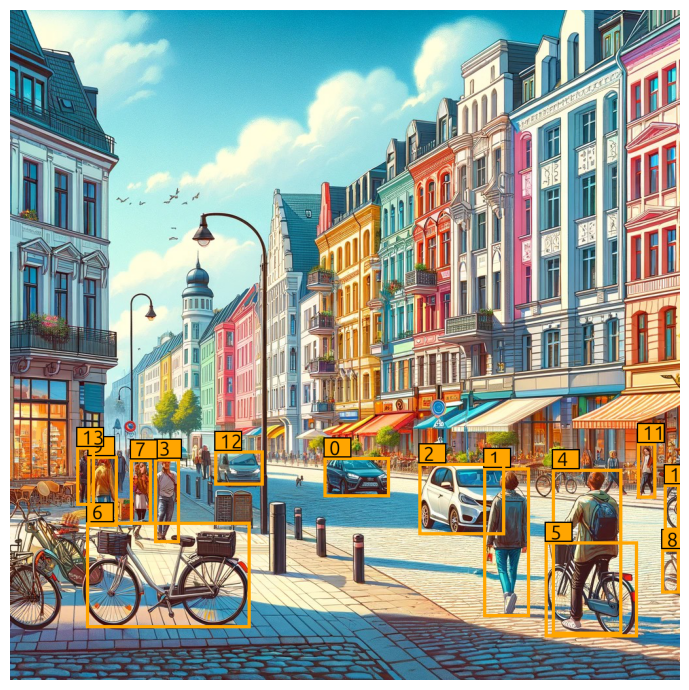

Recuadro 0--> Clase: car,	 Score: 0.8778764605522156,	 Caja: tensor([479.8883, 683.6398, 580.6799, 744.2516], device='cuda:0')
Recuadro 1--> Clase: person,	 Score: 0.8711369633674622,	 Caja: tensor([723.8831, 699.6281, 794.2302, 927.2527], device='cuda:0')
Recuadro 2--> Clase: car,	 Score: 0.8497547507286072,	 Caja: tensor([624.3212, 692.6537, 756.9240, 802.4709], device='cuda:0')
Recuadro 3--> Clase: person,	 Score: 0.8445959687232971,	 Caja: tensor([220.4718, 685.4314, 259.8442, 814.4322], device='cuda:0')
Recuadro 4--> Clase: person,	 Score: 0.8234404921531677,	 Caja: tensor([828.3610, 701.1053, 935.8299, 954.4529], device='cuda:0')
Recuadro 5--> Clase: bicycle,	 Score: 0.7793213725090027,	 Caja: tensor([817.9751, 812.5693, 959.1559, 958.2740], device='cuda:0')
Recuadro 6--> Clase: bicycle,	 Score: 0.7656781673431396,	 Caja: tensor([116.6321, 782.1196, 367.2387, 944.4985], device='cuda:0')
Recuadro 7--> Clase: person,	 Score: 0.7158570885658264,	 Caja: tensor([183.0309, 686.3452, 21

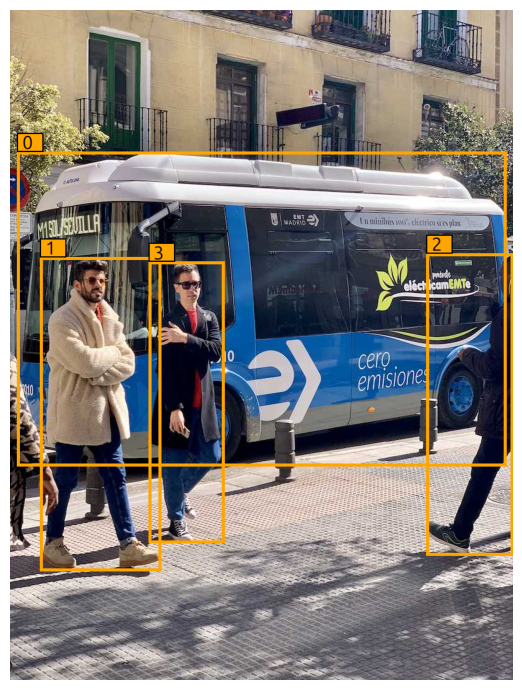

Recuadro 0--> Clase: bus,	 Score: 0.9391075372695923,	 Caja: tensor([ 11.9472, 228.3151, 799.1895, 735.3087], device='cuda:0')
Recuadro 1--> Clase: person,	 Score: 0.9017204642295837,	 Caja: tensor([ 48.6464, 398.2117, 243.0680, 904.5064], device='cuda:0')
Recuadro 2--> Clase: person,	 Score: 0.8498591780662537,	 Caja: tensor([670.6041, 392.3168, 810.0000, 879.6082], device='cuda:0')
Recuadro 3--> Clase: person,	 Score: 0.8376365900039673,	 Caja: tensor([223.0595, 405.5998, 345.2839, 859.7147], device='cuda:0')



In [69]:
for i,res in enumerate(results):    
    boxes = res.boxes  # Boxes object for bounding box outputs
    txt = ''
    filtrados = []
    for j,(cls,prob,coords) in enumerate(zip(boxes.cls,boxes.conf,boxes.xyxy)):
        if prob > 0.5:      # probabilidad mayor del 50%            
            # datos prediccion
            filtrados.append([cls,prob,coords])
            txt += 'Recuadro {}--> Clase: {},\t Score: {},\t Caja: {}\n'.format(j, clases[int(cls)], prob, coords)
    # imagen
    img = Image.open(imgs_arr[i])
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf", size=30)

    for i,caso in enumerate(filtrados):
        coords = caso[2]
        draw.rectangle([coords[0], coords[1], coords[2], coords[3]], outline='orange', width=5)
        draw.rectangle([coords[0], coords[1]-30, coords[0]+2 + 40, coords[1]],fill="black")
        draw.rectangle([coords[0]+2, coords[1]-28, coords[0] + 40, coords[1]-2],fill="orange")
        draw.text((coords[0]+8, coords[1]-32), str(i), fill="black",font=font)

    # mostrar resultados
    plt.figure(figsize=(13,7))
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    print(txt)

In [ ]:
# chuleta atributos
""" for res in results:    
    boxes = res.boxes          # Boxes object for bounding box outputs
    masks = res.masks          # Masks object for segmentation masks outputs
    keypoints = res.keypoints          # Keypoints object for pose outputs
    probs = res.probs          # Probs object for classification outputs
    obb = res.obb            # Oriented boxes object for OBB outputs
    res.show()              # display to screen
    res.save(filename="result.jpg")          # save to disk
    print(boxes.cls)
    print(boxes.conf) """

## EJERCICIO 3
YOLOv11 también sirve para segmentación, aplica segmentación a las dos imágenes con las que estamos trabajando

In [82]:
#segmentation  
model = YOLO('recursos/5_5/yolo/yolo11n-seg.pt')  
results = model(imgs_arr)  
for res in results:
    res.show()


100%|██████████| 5.90M/5.90M [00:00<00:00, 22.5MB/s]



0: 640x640 11 persons, 8 bicycles, 3 cars, 1 backpack, 2.9ms
1: 640x640 4 persons, 1 bus, 2.9ms
Speed: 2.4ms preprocess, 2.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


** Message: 18:43:26.205: main.vala:507: Starting session with system profile


** Message: 18:43:26.443: main.vala:507: Starting session with system profile


## EJERCICIO 4
De manera similar, podemos hacer la estimación de pose. Hazlo con las imágenes con las que estamos trabajando.

In [80]:
model = YOLO('recursos/5_5/yolo/yolo11n-pose.pt')  
results = model(imgs_arr)  
for res in results:
    res.show()


0: 640x640 2 persons, 6.8ms
1: 640x640 4 persons, 6.8ms
Speed: 2.2ms preprocess, 6.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


** Message: 18:26:00.377: main.vala:507: Starting session with system profile


** Message: 18:26:00.564: main.vala:507: Starting session with system profile


## EJERCICIO 5
Haz lo que se hace en el siguiente video:

https://www.youtube.com/watch?v=_YbEna8UNcU

Tienes parte del código en:

https://www.albertcoronado.com/2024/11/12/tutorial-yolo-11/

Para la parte fine tuning tienes que entrenar el modelo para que distina matrículas de coche, para entrenar el modelo utiliza el dataset que puedes descargar de:

https://universe.roboflow.com/parag-parmar-3qpin/car_license_plate-ypwmk/dataset/1

NOTA: HE CONSEGUIDO QUE FUNCIONE BIEN CV2 PERO ABRIENDO PRIMERO UNA IMAGEN:
```
img = cv2.imread('Datos/image3.jpg')
cv2.imshow("SAPA", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

## EJERCICIO 6
Repite el fine tuning del apartado anterior pero ahora en vez de como un comando en la terminal con código de python

## EJERCICIO 7
Vamos a contar los pasajeros de un autobus.

Sigue las instrucciones del siguiente video:

https://www.youtube.com/watch?v=hTI0Aj__SLE

ELIMINA LOS COMENTARIOS QUE HAY EN EL CÓDIGO Y COMENTA EL CÓDIGO CON TUS PROPIAS PALABRAS


## EJERCICIO 8
Adapta el código anterior para que cuente vehículos en el video vehicle-counting.mp4 (tiene que contar por separado coches y camiones)

## EJERCICIO 9
Adapta el ejercicio anterior para que en vez de coches cuente matrículas usando el modelo que has creado en el ejercicio 6. 

Si el video del apartado anterior no te sirve porque no se ven bien las matrículas crea un video con la IA generativa (si el video creado es demasiado corto junta varios videos en uno)

## EJERCICIO 10
Vamos a hacer fine tuning sobre el modelo para segmentación SAM-2.

Puedes sacar información de la siguiente página:

https://blog.roboflow.com/fine-tune-sam-2-1/

A la hora de conseguir el dataset, descargalo para no tener problemas con la API-KEY de Roboflow

## EJERCICIO 11 (OPCIONAL)
Haz fine tuning con sam2 o yolo11 para segmentación con otro dataset 

## EJERCICIO 12 (OPCIONAL)
En el siguiente enlace encontraras diferentes modelos y trabajos sobre la visión por computación, prueba alguno de ellos (algunos que no funcionan porque las librerías se han actualizado y tienes que adaptarlos, otros son recientes y no deberías tener problemas).

https://github.com/roboflow/notebooks

ELIMINA LOS COMENTARIOS QUE HAY EN EL CÓDIGO Y COMENTA EL CÓDIGO CON TUS PROPIAS PALABRAS